# 1 课堂示例代码

## 1.1 广告文本数据准备

In [1]:
# 使用pandas从Excel文件加载数据
import pandas as pd 
df = pd.read_excel('text_analysis_ad.xlsx',index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


## 1.2 广告文本数据预处理

In [2]:
# jieba 分词
import jieba 

def clean_text(text):
    words = jieba.lcut(text)
    return ' '.join(words)

test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\14368\AppData\Local\Temp\jieba.cache
Loading model cost 0.634 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [3]:
# 在DataFrame中添加分词后的广告文本列
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


## 1.3 训练并运用词向量模型对广告文本进行分析

In [4]:
# gensim库中的示例文本列表
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
# 切分广告文本分词并展示前五条结果
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [6]:
# 基于广告文本分词训练Word2Vec词嵌入模型

# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语

model = Word2Vec(corpus,               # 训练语料
                window = 5,            # 训练算法考虑的当前词与预测词语在一个句子中的最大距离（窗口大小）
                vector_size = 100,     # 自定义训练向量维度
                min_count = 1,         # 忽略所有总频数低于这个值的词语
                epochs = 10
)

# 保存训练好的模型
model.save('Word2Vec_ad.model')

In [7]:
# 提取并打印Word2Vec模型的词汇表和词向量
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list] # 获取词向量

# 打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

之:[-7.33142734e-01  1.28076363e+00  4.36742842e-01 -2.73162514e-01
 -4.23031688e-01 -2.41367269e+00  8.87964129e-01  2.93484735e+00
 -1.10874569e+00 -1.36512303e+00 -2.63049394e-01 -2.18137622e+00
 -1.51165590e-01  1.14192176e+00  6.46004498e-01 -2.72182256e-01
  3.67072284e-01 -6.03059530e-01 -9.29644890e-03 -2.20153332e+00
  1.06703937e+00 -6.01768605e-02  6.26846433e-01 -7.35017478e-01
 -1.31381154e-01  2.60984838e-01 -2.03045785e-01 -8.30921471e-01
 -8.97795200e-01 -1.10423215e-01  1.23670840e+00  6.60196662e-01
  2.41240740e-01 -8.98089588e-01 -6.60075724e-01  1.76137733e+00
  5.68195522e-01 -1.05498838e+00 -1.10322285e+00 -2.22552133e+00
  1.85517862e-01 -5.19816756e-01 -1.96809359e-02 -1.15789485e+00
  1.17154002e+00 -5.65431654e-01 -1.29129875e+00  4.56659108e-01
  9.64368522e-01  8.75213444e-01  5.13453126e-01 -4.40123856e-01
 -1.15409005e+00  5.87714911e-02 -6.57308757e-01  8.49114060e-01
  3.41750264e-01 -2.76227653e-01 -6.01942837e-01  3.98131222e-01
  3.51723820e-01  5.864

In [8]:
#计算并展示词嵌入模型中任意两词的余弦相似度

# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.71266747
0.6980013
0.6453346
0.9977275
0.9898486
0.99415815


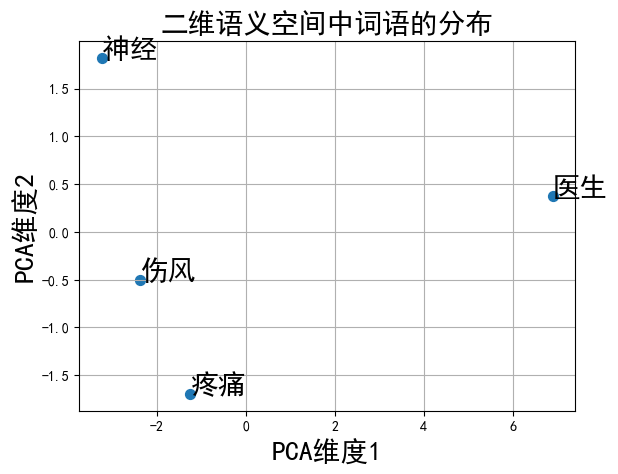

In [9]:
# 使用PCA降维可视化词嵌入模型的语义空间

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

# 2 代码练习-智慧养老政策

## 2.1 智慧养老政策数据准备

In [10]:
import pandas as pd # 数据表
df = pd.read_csv('智慧养老政策.csv', encoding='gbk')
df

,序号,标题,时效性,效力位阶,制定机关,发文字号,公布日期,施行日期,批准部门,批准日期,原文链接
0,地方规范性文件_672,黑龙江省人民政府办公厅关于推进养老服务发展的实施意见,现行有效,地方规范性文件,黑龙江省民政厅,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/b18e6be8f51692a1cbd...
1,地方规范性文件_673,广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见,现行有效,地方规范性文件,广西壮族自治区大数据发展局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/22f0c8beef6908e6866...
2,地方规范性文件_674,中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...,现行有效,地方规范性文件,无锡市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/42b6a5f466eaa99be8e...
3,地方规范性文件_675,贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见,现行有效,地方规范性文件,贵阳市民政局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/e67d28d08fea8084a66...
4,地方规范性文件_676,廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见,现行有效,地方规范性文件,廊坊市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/909deb5c2273a94ef8b...
...,...,...,...,...,...,...,...,...,...,...,...
2777,地方工作文件_15,郑州市人民政府关于印发郑州市数字政府建设行动方案的通知,现行有效,地方工作文件,郑州市人民政府,郑政〔2023〕25号,2023.12.25,2023.12.25,NaN,NaN,https://www.pkulaw.com/lar/b7908e42b1682d8bafd...
2778,部门规章_1,产业结构调整指导目录(2024年本),尚未施行,部门规章,国家发展和改革委员会(含原国家发展计划委员会、原国家计划委员会),中华人民共和国国家发展和改革委员会令第7号,2023.12.27,2024.02.01,NaN,NaN,https://www.pkulaw.com/chl/d8513a2dd8e4e297bdf...
2779,地方工作文件_14,山西省人民政府办公厅关于印发山西省数字政府建设规划(2023―2025年)的通知,现行有效,地方工作文件,山西省人民政府,晋政办发〔2023〕82号,2023.12.28,2023.12.28,NaN,NaN,https://www.pkulaw.com/lar/cf041968e90d5c7d666...
2780,地方工作文件_13,山东省人民政府办公厅关于印发《山东省养老服务高质量发展三年行动计划(2024—2026年)》的通知,现行有效,地方工作文件,山东省人民政府,鲁政办字〔2023〕207号,2023.12.30,2023.12.30,NaN,NaN,https://www.pkulaw.com/lar/d0f5a014d1a25e2fc83...


## 2.2 智慧养老政策数据预处理

In [11]:
# 中文标题文本的预处理、分词及添加到DataFrame

import jieba  
import pandas as pd  
import re  
  
# 定义中文标点符号列表  
chinese_punctuation = '()（）《》＜＞“”【】'  
  
# 定义预处理函数  
def preprocess_text(text):  
    # 去除标点符号  
    text = re.sub(f'[{re.escape(chinese_punctuation)}]+', '', text)  
      
    # 去除数字  
    text = re.sub(r'\d+', '', text)  
      
    # 去除指定文字  
    stopwords = ['关于', '人民政府', '印发']  
    for word in stopwords:  
        text = text.replace(word, '')  
      
    # 返回预处理后的文本  
    return text.strip()  
  
# 定义分词函数  
def tokenize_text(text):  
    # 使用jieba进行分词  
    words = jieba.lcut(text)  
    return words  
  
# 对df['标题']列中的每个文本进行预处理和分词  
tokenized_texts = [tokenize_text(preprocess_text(text)) for text in df['标题']]  
  
# 将分词结果转换为字符串，用空格分隔  
tokenized_texts_str = [' '.join(tokens) for tokens in tokenized_texts]  
  
# 将分词后的文本列表添加到df中作为新列  
df['标题分词'] = tokenized_texts_str  
  
# 打印前几行结果查看  
print(df[['标题', '标题分词']].head())

                                                  标题  \
0                         黑龙江省人民政府办公厅关于推进养老服务发展的实施意见   
1                      广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见   
2  中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...   
3                       贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见   
4                      廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见   

                                                标题分词  
0                       黑龙江省 办公厅 推进 养老 服务 发展 的 实施 意见  
1              广西壮族自治区 大 数据 发展局 全面 推进 数字化 转型 发展 的 意见  
2  中共 无锡市委 、 无锡市 加快 推进 数字 经济 高质量 发展 的 实施 意见 加快 推进...  
3              贵阳市 民政局 推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见  
4                   廊坊市 办公室 加快 推进 养老 服务体系 建设 的 实施 意见  


## 2.3 训练并运用词向量模型对智慧养老政策文本进行分析

In [12]:
# gensim库中的示例文本列表
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [18]:
# 切分智慧养老政策标题文本分词并展示前五条结果
corpus = df['标题分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['黑龙江省', '办公厅', '推进', '养老', '服务', '发展', '的', '实施', '意见']
['广西壮族自治区', '大', '数据', '发展局', '全面', '推进', '数字化', '转型', '发展', '的', '意见']
['中共', '无锡市委', '、', '无锡市', '加快', '推进', '数字', '经济', '高质量', '发展', '的', '实施', '意见', '加快', '推进', '总部', '经济', '高质量', '发展', '的', '实施', '意见', '加快', '推进', '枢纽', '经济', '高质量', '发展', '的', '实施', '意见', '的', '通知']
['贵阳市', '民政局', '推进', '贵阳', '贵安', '养老', '服务', '高质量', '发展', '的', '实施', '意见']
['廊坊市', '办公室', '加快', '推进', '养老', '服务体系', '建设', '的', '实施', '意见']


In [19]:
# 基于智慧养老政策标题文本训练Word2Vec词嵌入模型

# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
corpus = df['标题分词'].apply(lambda x: x.split()).tolist() # 切分词语

model = Word2Vec(corpus,               # 训练语料
                window = 5,            # 训练算法考虑的当前词与预测词语在一个句子中的最大距离（窗口大小）
                vector_size = 100,     # 自定义训练向量维度
                min_count = 1,         # 忽略所有总频数低于这个值的词语
                epochs = 10
)

# 保存训练好的模型
model.save('Word2Vec_ad.model')

In [20]:
# 提取并打印Word2Vec模型的词汇表和词向量

word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list] # 获取词向量

# 打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

的:[-0.19134374  0.14387883  0.40149805 -0.08388961  0.82761884 -1.0781829
  0.19954872  0.80757564 -0.1593819  -0.47655794  0.78293616 -0.25341552
  0.3103671   0.18507043  1.030282   -0.57441014  0.43463334  0.58633566
  0.29077342 -0.3033917   0.3813373   0.13366024  1.3281217  -0.7663584
  0.21414123  0.06544548 -0.76522994  0.47515544 -0.39248583  0.00699691
 -0.08898272  0.09795336  0.6770104  -0.9326618   0.09143537  0.08104711
  0.50707555  0.2957191  -0.32400307 -0.24779704 -0.6231522   0.10447387
  0.24091941 -0.2780792   0.2188802  -0.4255592  -0.15740177  0.29311383
  0.47633862 -0.14465167 -0.2599741   0.1739299  -0.14592107 -0.34343812
  0.09803725 -0.47042215  0.7987194  -0.56386256  0.46388885  0.34960118
 -0.26754886 -0.4039044   0.68830013  0.22850506 -1.121162    1.069211
 -0.18088783  0.46095425 -1.1517191   0.6973319   0.17759468  0.8480021
  0.4993306   0.31621927  0.5147641  -0.12177081  0.19654001  0.0822904
 -0.5790652  -0.19178842 -0.6783418   0.69715387 -0.591

In [22]:
#计算并展示词嵌入模型中任意两词的余弦相似度

# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('养老', '服务'))
print(model.wv.similarity('养老', '发展'))
print(model.wv.similarity('养老', '服务体系'))
print(model.wv.similarity('服务', '质量'))
print(model.wv.similarity('养老', '数字'))

0.98252213
0.55262786
0.7938384
0.6988878
0.4729201


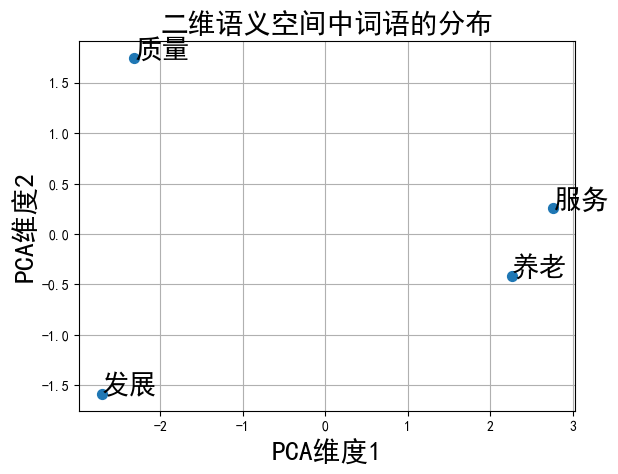

In [23]:
# 使用PCA降维可视化词嵌入模型的语义空间

words = ['养老', '服务', '质量', '发展']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

## 2.4 运用词向量模型分析智慧养老政策的收获通过利用词向量模型对了与智慧养老政策相关的词汇在语义空间中的进行了分析关系。借助余弦相似度这一指标我们得以量化并可视化这些词汇之间的语义接近性，从而更加清晰地理解智慧养老政策中各个概念之间的内在联系。

首先，从词向量模型计算出的余弦相似度结果来看，'养老'与'服务'之间的相似度高达0.98252213，接近于1，这表明在语义上这两个词具有极高的接近性。这符合我们的常识认知，因为养老服务是智慧养老政策中不可或缺的一环，为老年人提供高质量的服务是智慧养老政策的重要目一。其次，'养老'与'发展'之间的相似度为0.55262786，虽然不及'养老'与'服务'之间的相似度高，但也显示出了一定的相关性。这提示我们，智慧养老政策不仅仅关注于服务的提供，还涉及到养老产业的整体发展，包括政策支持、产业创新个方面。

此外，'养老'与'服务体系'之间的相似度为0.7938384，也显示出较高的接近性。这进一步强调了服务在智慧养老政策中的重要地位，同时提示我们服务体系的建设和完善是智慧养老政策实施过程中需要关注的方面。同时，我们也注意到'服务'与'质量'之间的相似度达到了0.6988878，说明在智慧养老政策中，服务质量是一个不可忽视的关键因素。提升服务质量，确保老年人能够享受到优质、高效的养老服务，是智慧养老政策实程中的重要目标。最后，虽然'养老'与'数字'之间的相似度相对较低，为0.4729201，但这并不意味着数字技术与智慧养老政策无关。实际上，随着数字技术的不断发展，其在智慧养老政策中的应用越来越广泛，如智升养老服质量和效率。

综上所述，通过词向量模型的分析，我们更部分入地理解了智慧养老政策中，地和实施智慧养老政策政策为我们进一步探索智慧养老领域我们进一步探索智慧养老领域的未来发展提供了有益的启示。